In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [3]:
df = pd.read_csv(url, header=0) # imports the dataset

In [4]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [5]:
headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers

In [6]:
df.replace('?', np.nan, inplace = True) #replaces the "?" entries with 'NaN'

In [7]:

#                 DATA WRANGLING


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [9]:
df.head(7)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560


In [10]:
missing_values = df.isnull()

for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print('')

age
False    2767
True        4
Name: count, dtype: int64

gender
False    2771
Name: count, dtype: int64

bmi
False    2771
Name: count, dtype: int64

no_of_children
False    2771
Name: count, dtype: int64

smoker
False    2764
True        7
Name: count, dtype: int64

region
False    2771
Name: count, dtype: int64

charges
False    2771
Name: count, dtype: int64



In [11]:

# Handling missing data:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


In [12]:
df[['charges']] = df[['charges']].round(2)

# or 
# df[["charges"]] = np.round(df[["charges"]],2)

In [13]:
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [14]:

#               EDPLORATORY DATA ANALYSIS


(0.0, 66902.85800000001)

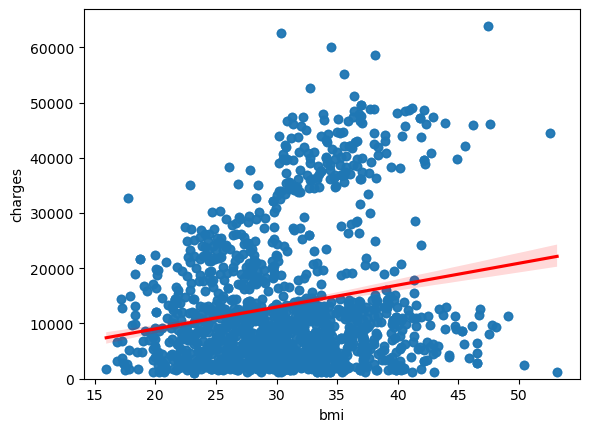

In [15]:
sns.regplot(x= 'bmi', y= 'charges', data = df, line_kws = {"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

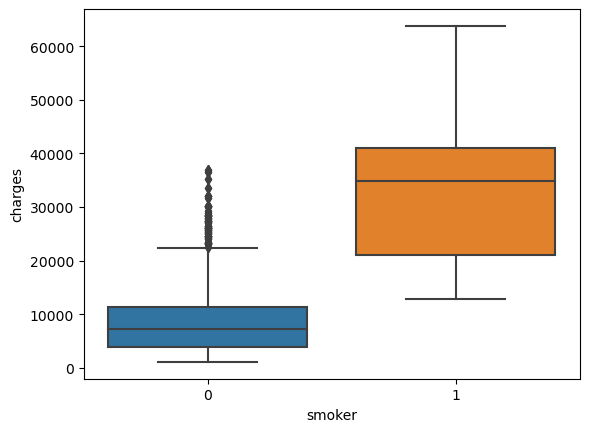

In [16]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)


In [17]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


In [18]:

#                 MODEL DEVELOPMENT


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = df[['smoker']]
Y = df[['charges']]
lr.fit(X, Y)

lr.score(X, Y)

0.6227430402464125

In [20]:

# Fitting the linear regression model that may be used to predict the 'charges' value, 
# just by using all other attributes of the dataset.

Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lr.fit(Z,Y)
lr.score(Z, Y)

0.7505888664568174

In [24]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
# Creating a training pipeline that uses StandardScaler(), PolynomialFeatures() 
# and LinearRegression() to create the model that can predict the 
# 'charges' value using all the other attributes of the dataset.

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype('float')
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8453701278194838


In [ ]:

#                    MODEL REFINEMENT


In [25]:
# Splitting the data into training and testing subsets, assuming that 20% of the data will be reserved for testing:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.2, random_state = 1)

In [28]:

# Initializing a Ridge regressor that used hyperparameter alpha =0.1
# Fit the model using training data data subset. Print the R^2 score for the testing data.

from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.1)
Ridge.fit(x_train, y_train)
yhat = Ridge.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412231


In [34]:

# Applying polynomial transformation to the training parameters with degree = 2.
# Use this transformed feature set to fit the same regression model, as above, using the training subset.
# Print the R^2 score for the testing subset.

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

Ridge.fit(x_train_pr, y_train)
y_hat = Ridge.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.8208413195172477
